In [1]:
#importing pandas before uploading my raw data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = "../data/raw/bank-additional-full.csv"
raw_bank_df = pd.read_csv(data_path)

Cleaning 

In [3]:
raw_bank_df

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."
...,...
41183,"73;""retired"";""married"";""professional.course"";""..."
41184,"46;""blue-collar"";""married"";""professional.cours..."
41185,"56;""retired"";""married"";""university.degree"";""no..."
41186,"44;""technician"";""married"";""professional.course..."


In [4]:
#the initial issue is that all the data is in one column and row. 
#will first split the column names: 

one_initial_column = raw_bank_df.columns
column_names = one_initial_column[0].split(';')

In [5]:
def clean_string(input_string):
    """
    Defining a function to clean non-alphabetic characters but replace '.', ' ', with '_'
    then will use map to apply the function 
    """
    cleaned_string = ""
    for char in input_string:
        if char.isalpha() or char.isdigit() or char in ['.', ' ', '_']:
            cleaned_string += char
    
    cleaned_string = cleaned_string.replace('.','_').replace(' ','_')
    return cleaned_string

#applying the function to each elemen in column_names to finalise the formatting 
     
cleaned_column_names = list(map(clean_string, column_names))
print(f"cleaned column names are {cleaned_column_names}")

cleaned column names are ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [6]:
#assigning the current one column name as the_column for easier applicaiton 

the_column = 'age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"'

In [7]:
#creating my data frame with these column names and corresponding values, original values were all 
#under one column. Using slicing to create my data frame 

new_data = []
for index, row in raw_bank_df.iterrows():
    values = row[the_column].replace('"',"").split(';')
    row_dict = dict(zip(cleaned_column_names, values))
    new_data.append(row_dict)

new_raw_bank_df = pd.DataFrame(new_data)

In [8]:
#checking for null values, no null 
#new_raw_bank_df.isnull().sum() because null values are tagged as unknown
# will change to nan to come up with a better strategy for filling 

new_raw_bank_df.replace('unknown', np.nan, inplace=True)

#decided to drop all null values as there are not much comparing the shapes before/after 

new_raw_bank_df.dropna(how='any', inplace=True)

In [9]:
#some numeric data have incorrect data type, will be changing accordingly: 

numeric_columns = ["age", "duration", "pdays", "previous",
                   "emp_var_rate", "cons_price_idx","cons_conf_idx",
                   "euribor3m", "nr_employed"
                  ]
for column in numeric_columns:
    new_raw_bank_df[column] = new_raw_bank_df[column].astype(float)

In [10]:
#checking for duplicates 
new_raw_bank_df.duplicated().sum()

#deleting duplicates 
new_raw_bank_df.drop_duplicates(inplace=True)

In [11]:
#resetting index 
new_raw_bank_df.reset_index(drop=True, inplace=True)

In [12]:
#since our key value is Y column, changing it to numeric for easier anlysis 

new_raw_bank_df['y'] = new_raw_bank_df['y'].apply(lambda x: 1 if x == 'yes' else 0)


Analysing Data 

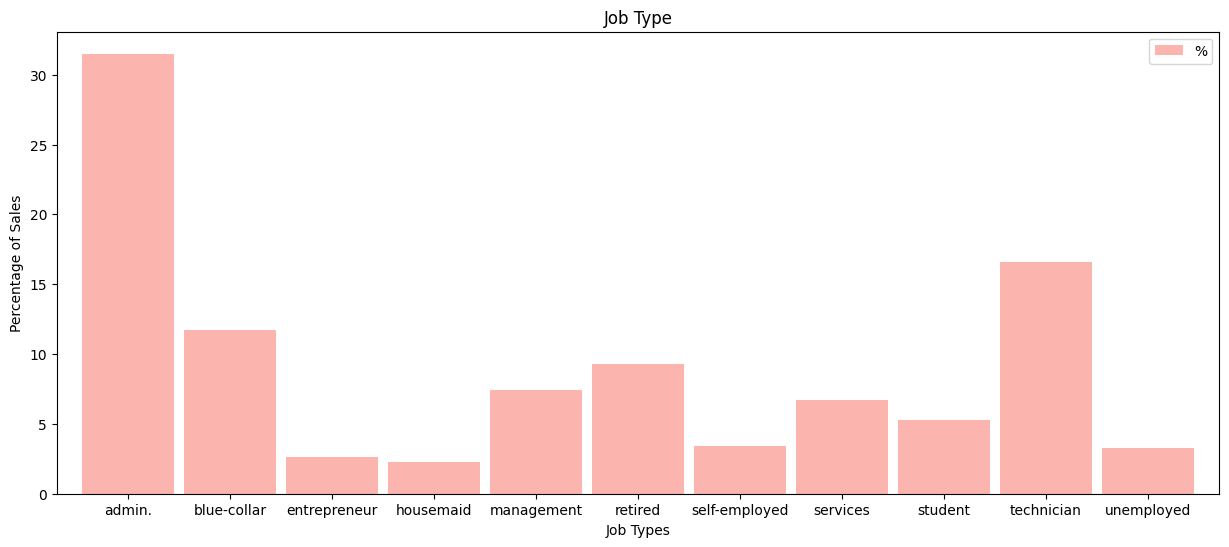

In [13]:
#grouping data by job and sum of Y
grouped_by_job = new_raw_bank_df.groupby('job')['y'].sum().reset_index()
grouped_by_job
#total number of people per job 
#job_value_count = new_raw_bank_df.job.value_counts().reset_index()
#job_value_count
#merging to see total number of people and total number of purchasers by job 

#merged_job_grouped = pd.merge(grouped_by_job, job_value_count, on='job')
#adding a new column to see the percentage of purchasers to total number of people, by job 

grouped_by_job['%'] = (grouped_by_job['y']*100/grouped_by_job['y'].sum()).round(1)


#this is the percentage of successfull sales per jobs type 

grouped_by_job.set_index('job', inplace=True)
grouped_by_job.drop(['y'], axis=1).plot(kind = 'bar',
                                width=0.9,
                                figsize = (15,6),
                                title = 'Job Type',
                                ylabel = 'Percentage of Sales',
                                xlabel = 'Job Types',
                                colormap = 'Pastel1'
                                ).set_xticklabels(grouped_by_job.index, rotation=0)
plt.savefig('Sales Percentages by Job Type')


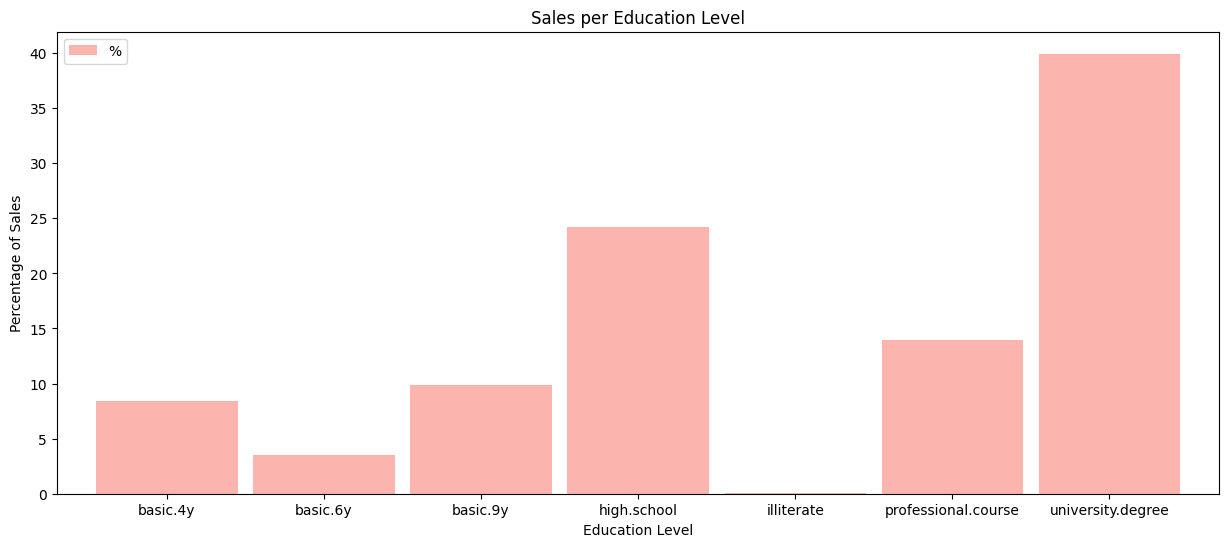

In [14]:
#PERCENTAGE OF SALES PER EDUCATION LEVEL

#grouping data by education and sum of Y
grouped_by_education = new_raw_bank_df.groupby('education')['y'].sum().reset_index()

#checking the percentage of sales per education level 
grouped_by_education['%'] = (grouped_by_education['y']*100/grouped_by_education['y'].sum()).round(2)


#creating a plot on this data 
grouped_by_education.set_index('education', inplace=True)

grouped_by_education.drop(['y'], axis=1).plot(kind = 'bar',
                                width=0.9,
                                figsize = (15,6),
                                title = 'Sales per Education Level',
                                ylabel = 'Percentage of Sales',
                                xlabel = 'Education Level',
                                colormap = 'Pastel1'
                                ).set_xticklabels(grouped_by_education.index, rotation=0)
plt.savefig('Sales Percentages by Education Level.png')

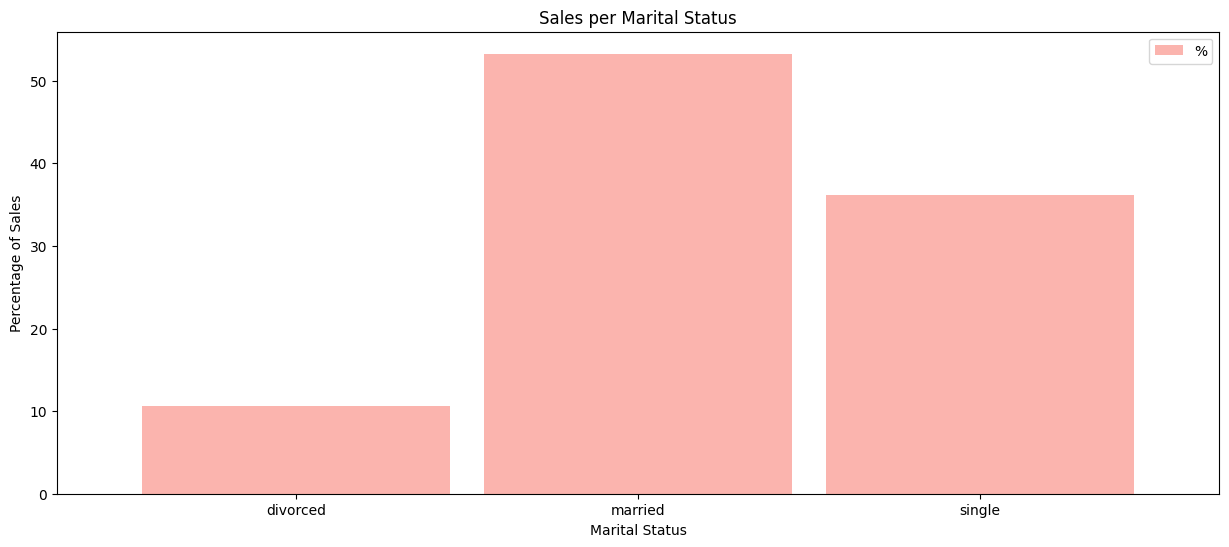

In [15]:
#PERCENTAGE OF SALES PER MARITAL STATUS

#grouping data by marital status and sum of Y
grouped_by_marital = new_raw_bank_df.groupby('marital')['y'].sum().reset_index()

#checking the percentage of sales per marital status  
grouped_by_marital['%'] = (grouped_by_marital['y']*100/grouped_by_marital['y'].sum()).round(2)

#creating a plot on this data 
grouped_by_marital.set_index('marital', inplace=True)

grouped_by_marital.drop('y',axis=1).plot(kind = 'bar',
                                width=0.9,
                                figsize = (15,6),
                                title = 'Sales per Marital Status',
                                ylabel = 'Percentage of Sales',
                                xlabel = 'Marital Status',
                                colormap = 'Pastel1'
                                ).set_xticklabels(grouped_by_marital.index, rotation=0)
plt.savefig('Sales Percentages per Marital Status.png')

In [16]:
#to check how sales look per age intervals, creating the intervals column :

new_raw_bank_df['age_interval'] = pd.cut(new_raw_bank_df['age'], 
                                          bins=[18, 25, 35, 45, 55, 65, 100], 
                                          labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66+'], 
                                          right=False)

In [17]:
#For better understanding, changing total sales per e type and age interval to the percentage compared to total sales 

def percentage_calculate(df, column_names):
    """defyining a new function to replace sale numbers 
    as percentages of sales numbers comparing to total sales"""
    
    for column in column_names:
        df[column] = (df[column] * 100 / df['y'].sum()).round(1)
    return df

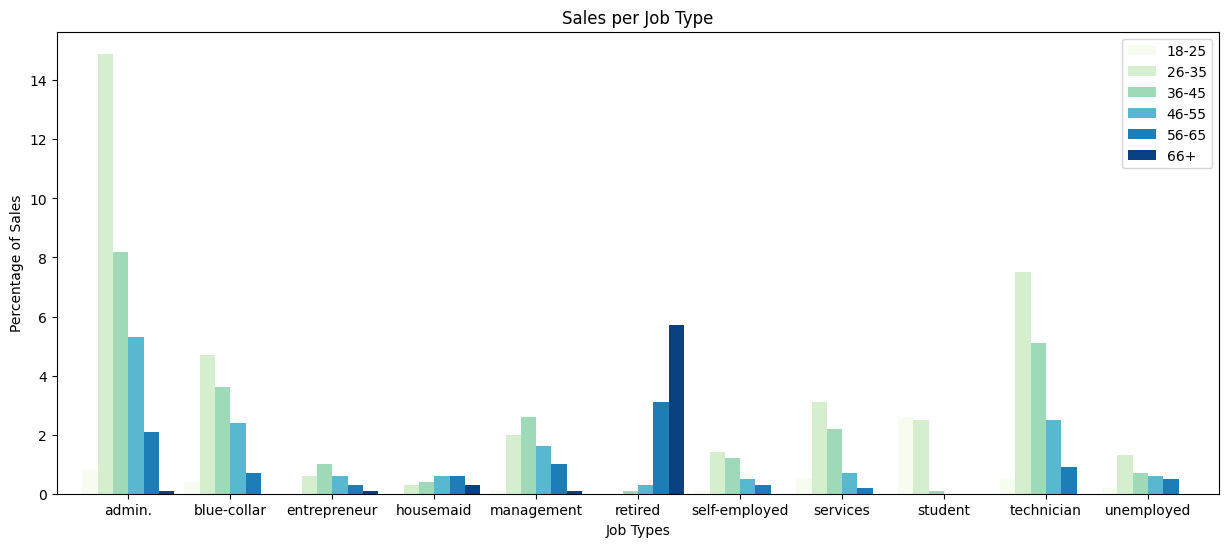

In [18]:
#PERCENTAGE OF SALES PER JOB AND AGE INTERVAL COMPARED TO TOTAL SALES 



#creating a pivot table that shows the total number of sales by age interval and job 

pivot_byjob = pd.pivot_table(
                  new_raw_bank_df,
                  values = 'y',
                  index='job',
                  columns='age_interval',
                  aggfunc = 'sum',
                  observed=False
                
)

#For better understanding, changing total sales per job type and age interval to the percentage compared to total sales 

merged_job = pd.merge(pivot_byjob, grouped_by_job, on='job')
column_names = list(merged_job.columns)
column_names.pop(-1)
column_names.pop(-1)

merged_job.drop(['%'], inplace=True, axis=1)

percentage_job_age_df = merged_job.copy()

percentage_job_age_df = percentage_calculate(percentage_job_age_df, column_names)

percentage_job_age_df.drop('y',axis=1).plot(kind = 'bar',
                                width=0.9,
                                figsize = (15,6),
                                title = 'Sales per Job Type',
                                ylabel = 'Percentage of Sales',
                                xlabel = 'Job Types',
                                colormap = 'GnBu'
                                ).set_xticklabels(percentage_job_age_df.index, rotation=0)
plt.savefig('Sales Percentages per Job Type and Age Group.png')

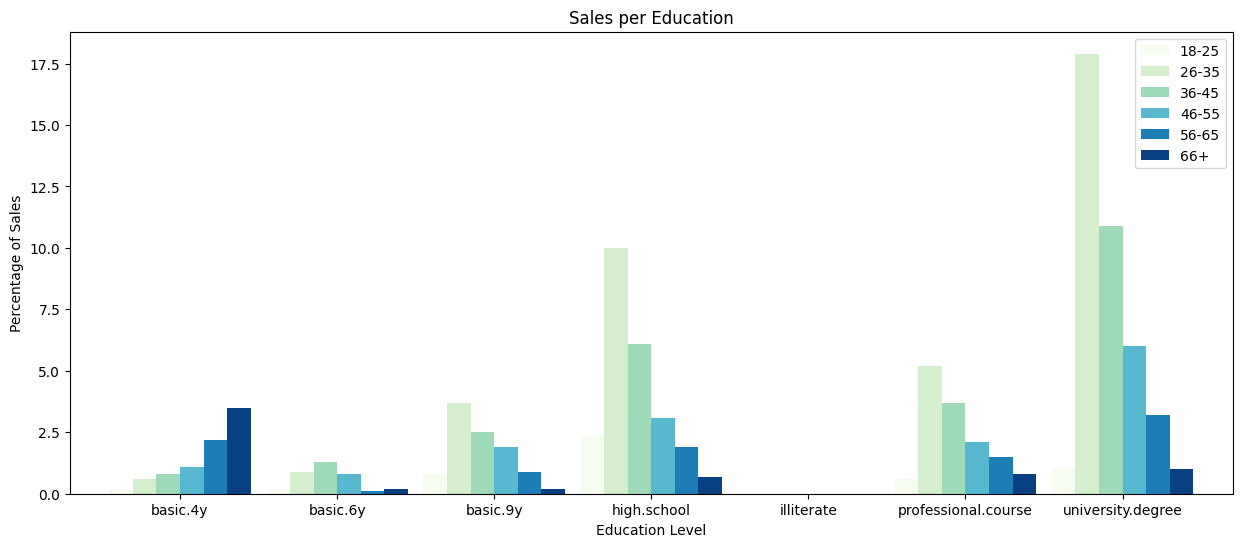

In [19]:
#creating a pivot table that shows the total number of sales by age interval and education 

pivot_byeducation = pd.pivot_table(
                  new_raw_bank_df,
                  values = 'y',
                  index='education',
                  columns='age_interval',
                  aggfunc = 'sum',
                  observed=False)
pivot_byeducation
grouped_by_education
merged_education= pd.merge(pivot_byeducation, grouped_by_education, on='education')
merged_education.drop('%',inplace=True, axis=1)
merged_education
percentage_education_age_df = merged_education.copy()
percentage_education_age_df = percentage_calculate(percentage_education_age_df, column_names)


percentage_education_age_df.drop('y',axis=1).plot(kind = 'bar',
                                width=0.9,
                                figsize = (15,6),
                                title = 'Sales per Education',
                                ylabel = 'Percentage of Sales',
                                xlabel = 'Education Level',
                                colormap = 'GnBu'
                                ).set_xticklabels(percentage_education_age_df.index, rotation=0)
plt.savefig('Sales Percentages per Education Level and Age Group.png')


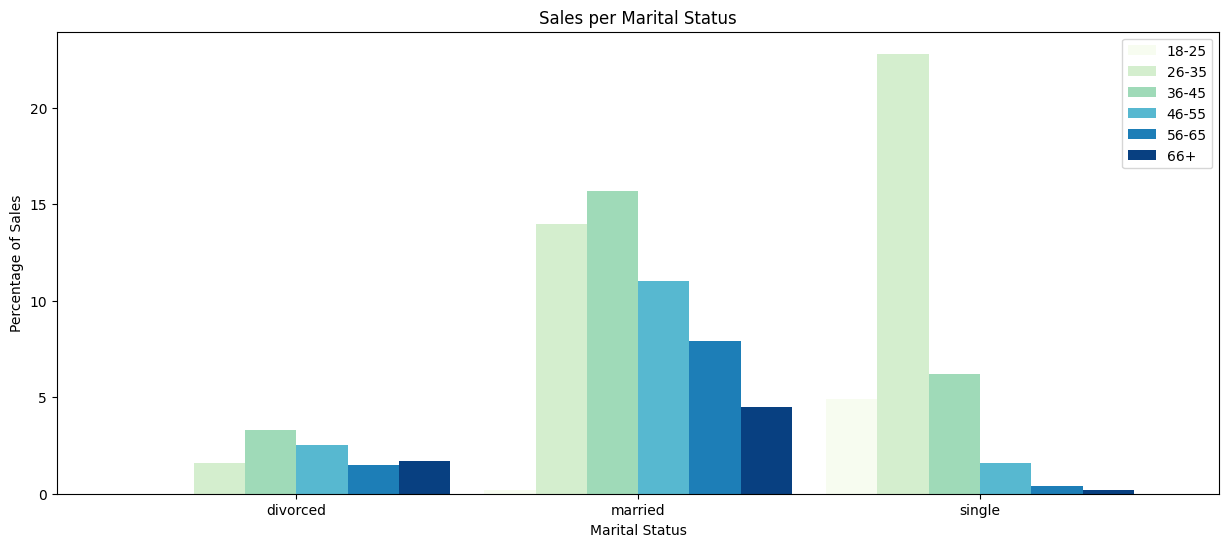

In [20]:
#PERCENTAGE OF SALES PER MARITAL STATUS AND AGE INTERVAL COMPARED TO TOTAL SALES 

#grouping data by marital status and sum of Y
grouped_by_marital = new_raw_bank_df.groupby('marital')['y'].sum().reset_index()

#creating a pivot table that shows the total number of sales by age interval and marital status 

pivot_bymarital = pd.pivot_table(
                  new_raw_bank_df,
                  values = 'y',
                  index='marital',
                  columns='age_interval',
                  aggfunc = 'sum',
                  observed=False
                
)

#For better understanding, changing total sales per e type and age interval to the percentage compared to total sales 

def percentage_calculate(df, column_names):
    """defyining a new function to replace sale numbers 
    as percentages of sales numbers comparing to total sales"""
    
    for column in column_names:
        df[column] = (df[column] * 100 / df['y'].sum()).round(1)
    return df

merged_marital= pd.merge(pivot_bymarital, grouped_by_marital, on='marital')


percentage_marital_age_df = merged_marital.copy()
percentage_marital_age_dff = percentage_calculate(percentage_marital_age_df, column_names)


percentage_marital_age_df.set_index('marital', inplace=True)

#percentage_marital_age_df.drop('y', axis=1, inplace=True)


percentage_marital_age_df.drop('y',axis=1).plot(kind = 'bar',
                                width=0.9,
                                figsize = (15,6),
                                title = 'Sales per Marital Status',
                                ylabel = 'Percentage of Sales',
                                xlabel = 'Marital Status',
                                colormap = 'GnBu'
                                ).set_xticklabels(percentage_marital_age_df.index, rotation=0)
plt.savefig('Sales Percentages per Marital Status and Age Group.png')